# Data Preparation and Analysis

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/all_ai_tool.csv'
df = pd.read_csv(file_path)

# Print column names to check for 'Major Category'
print(df.columns)

# Print first few rows to inspect data structure
print(df.head())

# Check for 'Major Category' in columns and display its value counts
if 'Major Category' in df.columns:
    category_distribution = df['Major Category'].value_counts().reset_index(name='count')
    category_distribution.columns = ['Major Category', 'Count']
    print(category_distribution)
else:
    print("Column 'Major Category' not found in the dataset.")


Index(['AI Tool Name', 'Charges', 'Review', 'cluster'], dtype='object')
    AI Tool Name  Charges  Review  cluster
0         Farm3D     0.00     0.0        1
1  Mailbutler Ai     4.95     1.0        1
2       Maverick   100.00     0.0        1
3           0Xai     0.00     0.0        1
4          10Web     0.00     0.0        1
Column 'Major Category' not found in the dataset.


In [ ]:
# Print column names to check for 'Major Category'
print(df.columns)

# Print first few rows to inspect data structure
print(df.head())


Index(['AI Tool Name', 'Charges', 'Review', 'cluster'], dtype='object')
    AI Tool Name  Charges  Review  cluster
0         Farm3D     0.00     0.0        1
1  Mailbutler Ai     4.95     1.0        1
2       Maverick   100.00     0.0        1
3           0Xai     0.00     0.0        1
4          10Web     0.00     0.0        1


# User Behavior Analysis Based on Available Data

In [ ]:

# Step 2: Analyze Tools by Review

# Analyze the tools based on their review
review_distribution = df['Review'].value_counts().reset_index(name='count')
review_distribution.columns = ['Review', 'Count']
print(review_distribution)

# Categorize tools based on charges
df['Price Category'] = pd.cut(df['Charges'], bins=[-1, 0, 100, np.inf], labels=['Free', 'Paid (Under $100)', 'Paid (Over $100)'])

# Analyze distribution of price categories
price_distribution = df['Price Category'].value_counts().reset_index(name='count')
price_distribution.columns = ['Price Category', 'Count']
print(price_distribution)

    Review  Count
0      0.0   3510
1      1.0    942
2      2.0    256
3      3.0    108
4      4.0     53
5      6.0     20
6      5.0     20
7      8.0     17
8      7.0     16
9      9.0      8
10    10.0      6
11    11.0      4
12    14.0      3
13    15.0      2
14    13.0      2
15    22.0      1
16    42.0      1
      Price Category  Count
0               Free   2648
1  Paid (Under $100)   2237
2   Paid (Over $100)     84


In [ ]:
print(df.head())

    AI Tool Name  Charges  Review  cluster
0         Farm3D     0.00     0.0        1
1  Mailbutler Ai     4.95     1.0        1
2       Maverick   100.00     0.0        1
3           0Xai     0.00     0.0        1
4          10Web     0.00     0.0        1


# Clustering Tools by Charges and Review

In [ ]:
# Prepare the data for clustering
clustering_data = df[['Charges', 'Review']]

# Ensure the data is numeric (though you've already done this earlier)
clustering_data = clustering_data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scale the data using StandardScaler
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


In [ ]:
from sklearn.cluster import KMeans

# Define features for clustering
clustering_data = df[['Charges', 'Review']]

# Ensure the data is numeric (though you've already done this earlier)
clustering_data = clustering_data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scale the data using StandardScaler
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Define the number of clusters
num_clusters = 3

# Explicitly set n_init to suppress FutureWarning
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Print the clustered data to verify
print(df[['AI Tool Name', 'Charges', 'Review', 'cluster']].head())


    AI Tool Name  Charges  Review  cluster
0         Farm3D     0.00     0.0        1
1  Mailbutler Ai     4.95     1.0        1
2       Maverick   100.00     0.0        1
3           0Xai     0.00     0.0        1
4          10Web     0.00     0.0        1


In [ ]:
# Print the clustered data
print(df[['AI Tool Name', 'Charges', 'Review', 'cluster']].head())


    AI Tool Name  Charges  Review  cluster
0         Farm3D     0.00     0.0        1
1  Mailbutler Ai     4.95     1.0        1
2       Maverick   100.00     0.0        1
3           0Xai     0.00     0.0        1
4          10Web     0.00     0.0        1


# Content-Based Recommendation System

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming 'df' is already loaded)
file_path = '/content/all_ai_tool.csv'
df = pd.read_csv(file_path)

# Define features for clustering
clustering_data = df[['Charges', 'Review']]

# Ensure the data is numeric
clustering_data = clustering_data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scale the data using StandardScaler
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Define the number of clusters
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Function to get recommendations based on cosine similarity
def get_recommendations(tool_name, df=df):
    # Combine relevant text features for the recommendation system
    df['combined_features'] = df['AI Tool Name'].astype(str) + ' ' + df['Charges'].astype(str)

    # Convert text to TF-IDF feature vectors
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['combined_features'])

    # Compute cosine similarity between tools
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Check if the tool exists
    if tool_name not in df['AI Tool Name'].values:
        return f"Tool '{tool_name}' not found in the dataset."

    # Get the index of the tool that matches the tool_name
    idx = df[df['AI Tool Name'] == tool_name].index[0]

    # Get the pairwise similarity scores of all tools with that tool
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the tools based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar tools
    sim_scores = sim_scores[1:11]

    # Get the tool indices
    tool_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar tools
    return df[['AI Tool Name', 'Charges', 'Review', 'cluster']].iloc[tool_indices]

# Example: Get recommendations for a specific tool after clustering
recommendations = get_recommendations('Mailbutler Ai')
print(recommendations)


     AI Tool Name  Charges  Review  cluster
510        Avc.Ai     9.95     0.0        1
2660     Maskr.Ai     7.95     0.0        1
169     Ai Suitup    19.95     1.0        1
3291     Pooks.Ai    19.95     0.0        1
267        Ajelix     5.95     1.0        1
977       Clipgpt     3.95     0.0        1
1059       Compar     8.95     1.0        1
2073       Hubble    95.00     0.0        1
3645  Resumemaker     4.95     0.0        1
3994         Soon     5.95     1.0        1


In [ ]:
# Export clustered data
df[['AI Tool Name', 'Charges', 'Review', 'cluster']].to_csv('/content/clustered_tools.csv', index=False)


# Export Analysis Results for Visualization

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define features for clustering
clustering_data = df[['Charges', 'Review']]

# Scale the features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Define the number of clusters
num_clusters = 3

# Explicitly set n_init to suppress FutureWarning
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  # Set n_init to 10 or another suitable value
# Adjust n_init to avoid the warning and ensure consistent behavior

# Apply K-means clustering
df['cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Print the clustered data to verify
print(df[['AI Tool Name', 'Charges', 'Review', 'cluster']].head())


    AI Tool Name  Charges  Review  cluster
0         Farm3D     0.00     0.0        1
1  Mailbutler Ai     4.95     1.0        1
2       Maverick   100.00     0.0        1
3           0Xai     0.00     0.0        1
4          10Web     0.00     0.0        1


# Plotting a line Chart for Major Categories of AI Tools

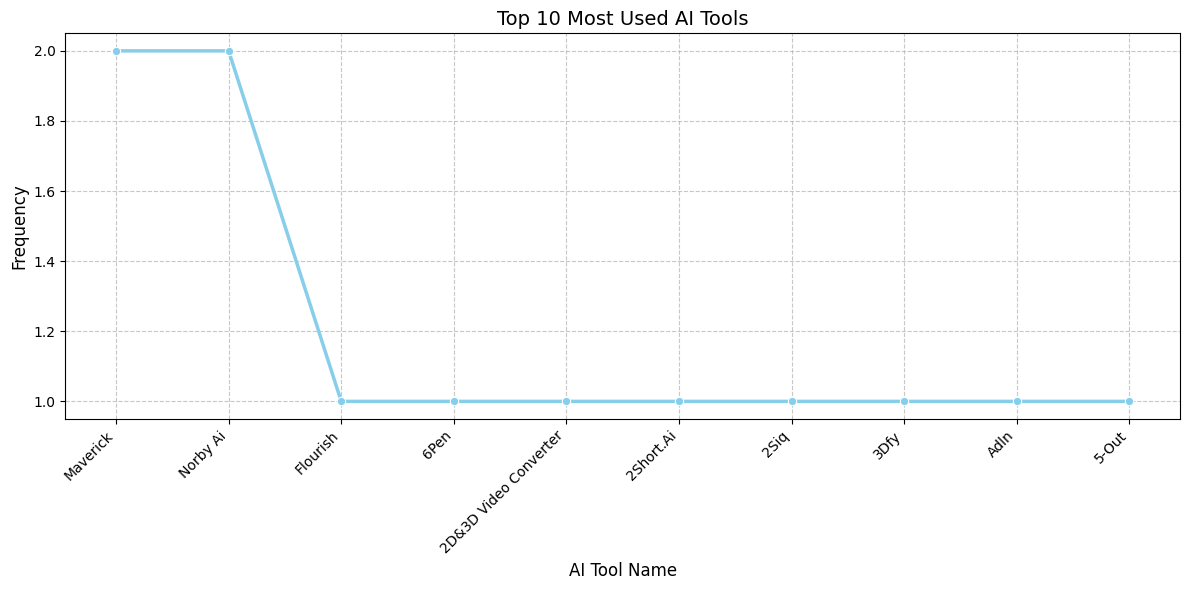

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for enhanced styling

# Load the dataset
file_path = '/content/all_ai_tool.csv'
df = pd.read_csv(file_path)

# Calculate the frequency of each AI tool
tool_counts = df['AI Tool Name'].value_counts().reset_index(name='count')
tool_counts.columns = ['AI Tool Name', 'Count']

# Sort the tools by count (optional, if you want to show them sorted)
tool_counts = tool_counts.sort_values(by='Count', ascending=False).head(10)

# Plotting the line chart with Seaborn style
plt.figure(figsize=(12, 6))
sns.lineplot(data=tool_counts, x='AI Tool Name', y='Count', marker='o', color='skyblue', linewidth=2.5)
plt.xlabel('AI Tool Name', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 Most Used AI Tools', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotates and adjusts font size of x-axis labels
plt.yticks(fontsize=10)  # Adjusts font size of y-axis labels
plt.grid(True, linestyle='--', alpha=0.7)  # Adds grid with dashed lines and reduced opacity
plt.tight_layout()

# Display the plot
plt.show()


# SQL Integration

In [ ]:
# Import SQLite library
import sqlite3

import matplotlib.pyplot as plt

# Connect to SQLite database (creates a new database if it doesn't exist)
conn = sqlite3.connect('user_behavior.db')


# Creating Tables

In [ ]:
# Create a table for user actions
create_user_actions_table = """
CREATE TABLE IF NOT EXISTS user_actions (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    user_id INTEGER,
    action TEXT,
    timestamp DATETIME
);
"""

# Execute the SQL statement
conn.execute(create_user_actions_table)


# Inserting Sample Data

In [ ]:
# Sample data insertion into user_actions table
sample_data_insertion = """
INSERT INTO user_actions (user_id, action, timestamp)
VALUES
    (1, 'login', '2024-07-15 10:30:00'),
    (2, 'view_page', '2024-07-15 10:35:00'),
    (1, 'logout', '2024-07-15 11:00:00'),
    (3, 'view_page', '2024-07-15 11:15:00');
"""

# Execute the SQL statement
conn.executescript(sample_data_insertion)


# Performing User Behavior Analysis

In [ ]:
# Query 1: Count total number of actions per user

query1 = """
SELECT user_id, COUNT(*) AS num_actions
FROM user_actions
GROUP BY user_id;
"""

# Execute the query and fetch results
results1 = conn.execute(query1).fetchall()
print("User ID | Num Actions")
for row in results1:
    print(f"{row[0]} | {row[1]}")


User ID | Num Actions
1 | 2
2 | 1
3 | 1


In [ ]:
# Query 2: Find users who logged in after a certain time

query2 = """
SELECT user_id, timestamp
FROM user_actions
WHERE action = 'login' AND timestamp > '2024-07-15 10:45:00';
"""

# Execute the query and fetch results
results2 = conn.execute(query2).fetchall()
print("User ID | Login Timestamp")
for row in results2:
    print(f"{row[0]} | {row[1]}")



User ID | Login Timestamp


In [ ]:
# Close the connection
conn.close()


# Plotting User Actions

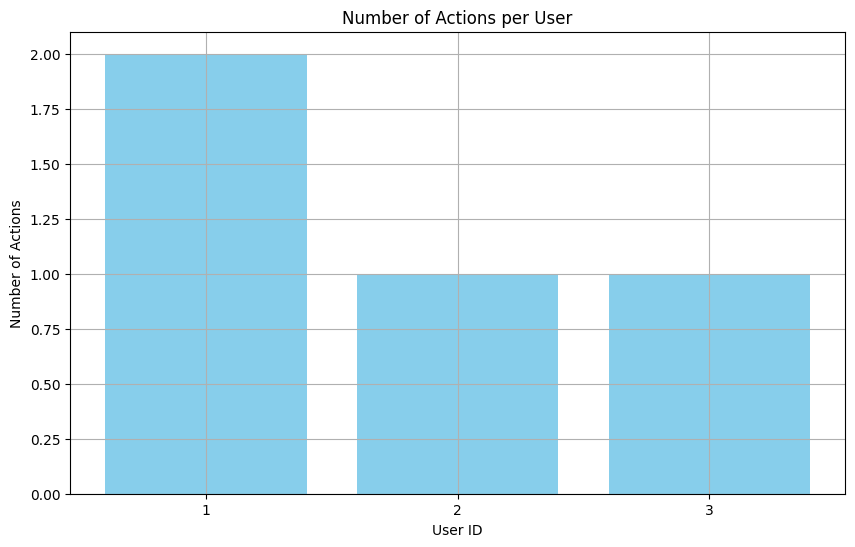

In [ ]:
# Connect to SQLite database
conn = sqlite3.connect('user_behavior.db')

# Query to count total number of actions per user
query = """
SELECT user_id, COUNT(*) AS num_actions
FROM user_actions
GROUP BY user_id;
"""

# Execute the query and fetch results
cursor = conn.execute(query)
results = cursor.fetchall()

# Close the connection
conn.close()

# Extract data for plotting
user_ids = [row[0] for row in results]
num_actions = [row[1] for row in results]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(user_ids, num_actions, color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Number of Actions')
plt.title('Number of Actions per User')
plt.xticks(user_ids)
plt.grid(True)
plt.show()
